## Name : Vrajkumar Patel
### Dogs vs. Cats


In [11]:
#import libraries
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [12]:
#Load the data
def load_data_from_folders(dataset_path, img_size):
    images = []
    labels = []

    print(f"Loading data from: {dataset_path}")

    # Check if the dataset path exists
    if not os.path.exists(dataset_path):
        raise ValueError(f"Dataset path {dataset_path} does not exist.")
    
    for label in os.listdir(dataset_path):
        class_dir = os.path.join(dataset_path, label)
        if os.path.isdir(class_dir):
            print(f"Loading from directory: {class_dir}")
            for img_file in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_file)
                img = cv2.imread(img_path, cv2.IMREAD_COLOR)
                if img is not None:
                    img = cv2.resize(img, (img_size, img_size))
                    images.append(img)
                    labels.append(label)
                else:
                    print(f"Failed to load image: {img_path}")

    images = np.array(images)
    labels = np.array(labels)

    print(f"Loaded {len(images)} images from {dataset_path}")
    if len(images) > 0:
        print(f"Labels: {np.unique(labels)}")
    else:
        print("No images were loaded.")

    return images, labels


In [13]:
# Paths to the dataset
TRAIN_PATH = r'C:/Users/ASUS/OneDrive - techno/Desktop/SCT_ML_TASKS/Task-3/dataset/training_set/training_set' 
TEST_PATH = r'C:/Users/ASUS/OneDrive - techno/Desktop/SCT_ML_TASKS/Task-3/dataset/test_set/test_set'    

# Parameters
IMG_SIZE = 64  # Resize images to 64x64

# Load training and testing data
train_images, train_labels = load_data_from_folders(TRAIN_PATH, IMG_SIZE)
test_images, test_labels = load_data_from_folders(TEST_PATH, IMG_SIZE)

# Check if data is loaded correctly
if len(train_labels) == 0:
    raise ValueError("Training labels not found or not loaded correctly.")
if len(test_images) == 0:
    raise ValueError("Test images not found or not loaded correctly.")


Loading data from: C:/Users/ASUS/OneDrive - techno/Desktop/SCT_ML_TASKS/Task-3/training_set/training_set
Loading from directory: C:/Users/ASUS/OneDrive - techno/Desktop/SCT_ML_TASKS/Task-3/training_set/training_set\cats
Failed to load image: C:/Users/ASUS/OneDrive - techno/Desktop/SCT_ML_TASKS/Task-3/training_set/training_set\cats\_DS_Store
Loading from directory: C:/Users/ASUS/OneDrive - techno/Desktop/SCT_ML_TASKS/Task-3/training_set/training_set\dogs
Failed to load image: C:/Users/ASUS/OneDrive - techno/Desktop/SCT_ML_TASKS/Task-3/training_set/training_set\dogs\_DS_Store
Loaded 8005 images from C:/Users/ASUS/OneDrive - techno/Desktop/SCT_ML_TASKS/Task-3/training_set/training_set
Labels: ['cats' 'dogs']
Loading data from: C:/Users/ASUS/OneDrive - techno/Desktop/SCT_ML_TASKS/Task-3/test_set/test_set
Loading from directory: C:/Users/ASUS/OneDrive - techno/Desktop/SCT_ML_TASKS/Task-3/test_set/test_set\cats
Failed to load image: C:/Users/ASUS/OneDrive - techno/Desktop/SCT_ML_TASKS/Task-3

In [21]:
# Convert labels to numerical format
import joblib
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

label_encoder_filename = 'label_encoder.pkl'
joblib.dump(label_encoder, label_encoder_filename)
print(f"Label encoder saved to {label_encoder_filename}")

print(f"Label encoding complete. Classes: {label_encoder.classes_}")

# Flatten images
train_data = train_images.reshape((train_images.shape[0], -1))
test_data = test_images.reshape((test_images.shape[0], -1))



Label encoder saved to label_encoder.pkl
Label encoding complete. Classes: ['cats' 'dogs']


In [15]:
# Train the SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(train_data, train_labels_encoded)
import joblib
model_filename = 'svm_model2.pkl'
joblib.dump(svm_model, model_filename)
print(f"Model saved to {model_filename}")


Model saved to svm_model2.pkl


Accuracy: 0.55
Classification Report:
              precision    recall  f1-score   support

        cats       0.55      0.58      0.56      1011
        dogs       0.55      0.52      0.54      1012

    accuracy                           0.55      2023
   macro avg       0.55      0.55      0.55      2023
weighted avg       0.55      0.55      0.55      2023



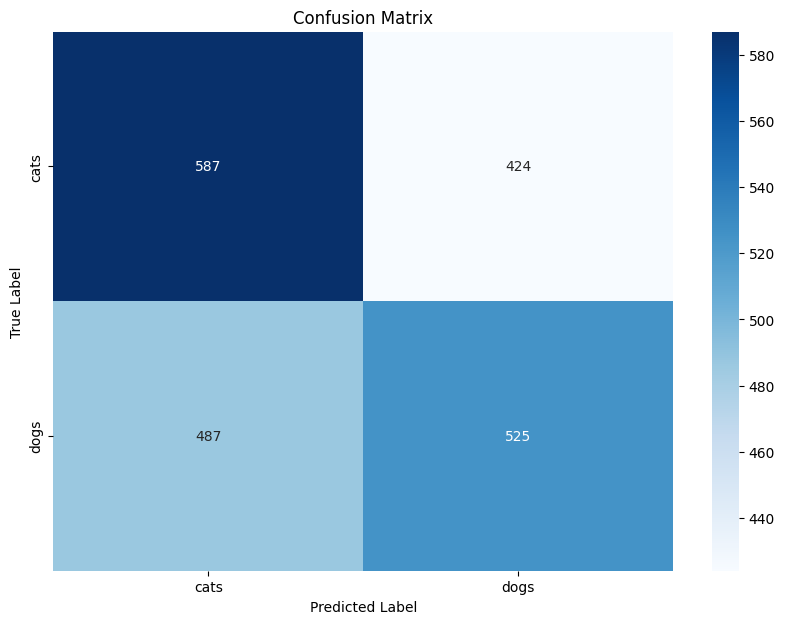

In [16]:
# Predict on test data
test_pred = svm_model.predict(test_data)

# Evaluate the model
accuracy = accuracy_score(test_labels_encoded, test_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(test_labels_encoded, test_pred, target_names=label_encoder.classes_))

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, label_encoder):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(test_labels_encoded, test_pred, label_encoder)


In [23]:
def predict_image(image_path, model, label_encoder, img_size=IMG_SIZE):
    # Load and preprocess the image
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if img is None:
        raise ValueError("Image not found or could not be loaded.")
    
    img = cv2.resize(img, (img_size, img_size))
    img = img.astype('float32') / 255.0  # Normalize to [0, 1]
    img = img.reshape((1, -1))  # Flatten image

    # Predict using the loaded model
    prediction = model.predict(img)
    predicted_label = label_encoder.inverse_transform(prediction)
    
    return predicted_label[0]

# Load the model from the file
loaded_model = joblib.load('svm_model2.pkl')
print("Model loaded successfully")

# Load the label encoder
label_encoder = joblib.load('label_encoder.pkl')
print("Label encoder loaded successfully")

# Example user input
image_path = input("Enter the path to the image for prediction: ")
try:
    result = predict_image(image_path, loaded_model, label_encoder)
    print(f"Predicted class: {result}")
except ValueError as e:
    print(e)


Model loaded successfully
Label encoder loaded successfully
Predicted class: cats
